In [1]:
from timeit import default_timer as timer
start = timer()

In [2]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.datasets import cifar10 as cf10

import matplotlib.pylab as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2023-10-12 08:40:40.865348: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-12 08:40:42.655780: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/nilray/miniconda3/envs/tf-gpu/lib/:/home/nilray/miniconda3/envs/tf-gpu/lib/
2023-10-12 08:40:42.658500: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/nilray/miniconda3/envs/tf-gpu/lib/:/home

In [3]:
print("Tensorflow version: ",tf.__version__)

Tensorflow version:  2.11.1


In [4]:
# Load image data from CIFAR-10 dataset
(train_images,train_labels),(test_images,test_labels) = cf10.load_data()

In [5]:
# Define helper function to view images
def show_images(train_images,class_names,train_labels,nb_samples=12, nb_row=4):
    plt.figure(figsize=(12,12))
    for i in range(nb_samples):
        plt.subplot(nb_row,nb_row,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i],cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()
    

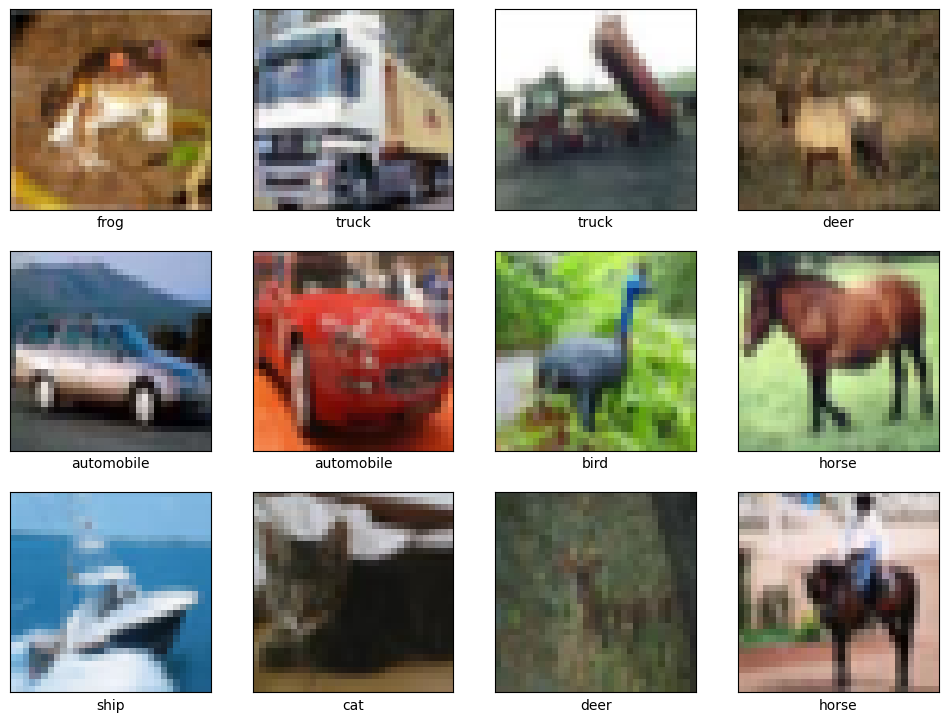

In [6]:
#Show samples images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog','frog','horse','ship','truck']
show_images(train_images, class_names,train_labels)

In [7]:
# Data pre-processing

# Data augmentation


# normalize pixel values between 0 and 1
#max_pixel_value = 255

#train_images = train_images / max_pixel_value
#test_images = test_images / max_pixel_value

In [8]:
# convert labels from text to one-hot vectors
train_labels = tf.keras.utils.to_categorical(train_labels, len(class_names))
test_labels = tf.keras.utils.to_categorical(test_labels, len(class_names))

In [9]:
# Define the model architecture

#Constants
INPUT_SHAPE = (32,32,3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3,3)
POOL_SHAPE = (2,2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)
MAX_PIXEL_SIZE = 255

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=INPUT_SHAPE))
#model.add(tfl.RandomFlip("horizontal"))
#model.add(tfl.RandomRotation(0.1))
model.add(tfl.Rescaling(1.0/MAX_PIXEL_SIZE))

model.add(tfl.Conv2D(FILTER1_SIZE,FILTER_SHAPE,activation='relu'))
model.add(tfl.BatchNormalization())
model.add(tfl.MaxPooling2D(POOL_SHAPE))

model.add(tfl.Conv2D(FILTER2_SIZE,FILTER_SHAPE,activation='relu'))
model.add(tfl.BatchNormalization())
model.add(tfl.MaxPooling2D(POOL_SHAPE))

model.add(tfl.Flatten())
model.add(tfl.Dense(FULLY_CONNECT_NUM,activation='relu'))
model.add(tfl.Dropout(rate=0.1))
model.add(tfl.Dense(NUM_CLASSES,activation='softmax'))

model.summary()

2023-10-12 08:40:47.676699: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-12 08:40:47.742663: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-12 08:40:47.742780: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-12 08:40:47.743955: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)       2

In [12]:
#Model compiling

BATCH_SIZE = 32
EPOCHS = 30
METRICS = ['accuracy',
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall')
           ]

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=METRICS)


In [13]:
# model training

training_history = model.fit(x=train_images,
                             y=train_labels,
                             epochs=EPOCHS,
                             batch_size=BATCH_SIZE,
                             validation_data=(test_images, test_labels))


Epoch 1/30
1563/1563 [==============================] - 20s 11ms/step - loss: 1.2578 - accuracy: 0.5598 - precision: 0.7171 - recall: 0.4103 - val_loss: 1.1461 - val_accuracy: 0.6060 - val_precision: 0.7448 - val_recall: 0.4690
Epoch 2/30
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9708 - accuracy: 0.6603 - precision: 0.7819 - recall: 0.5489 - val_loss: 0.9860 - val_accuracy: 0.6596 - val_precision: 0.7638 - val_recall: 0.5615
Epoch 3/30
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8154 - accuracy: 0.7148 - precision: 0.8113 - recall: 0.6250 - val_loss: 1.3041 - val_accuracy: 0.5678 - val_precision: 0.6577 - val_recall: 0.4964
Epoch 4/30
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7057 - accuracy: 0.7517 - precision: 0.8341 - recall: 0.6792 - val_loss: 0.9336 - val_accuracy: 0.6874 - val_precision: 0.7764 - val_recall: 0.6080
Epoch 5/30
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6075 - a

In [15]:
# model evaluation helper function

def show_performance_curve(training_result, metric, metric_label):
    train_perf = training_result.history[str(metric)]
    validation_perf = training_result.history['val_'+str(metric)]
    #intersection_idx = np.argwhere(np.isclose(train_perf,validation_perf,atol=1e-2)).flatten()[0]
    #intersection_value = train_perf[intersection_idx]
    
    plt.plot(train_perf, label=metric_label)
    plt.plot(validation_perf,label='val_'+str(metric))
    
    #plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')
    
    # plt.annotate(f'Optimal value: {intersection_value:.4f}',
    #              xy=(intersection_idx,intersection_value),
    #              xycoords='data',
    #              fontsize=10,
    #              color = 'green')
    plt.xlabel('Epoch')
    plt.ylabel(metric_label)
    plt.legend(loc='lower right')

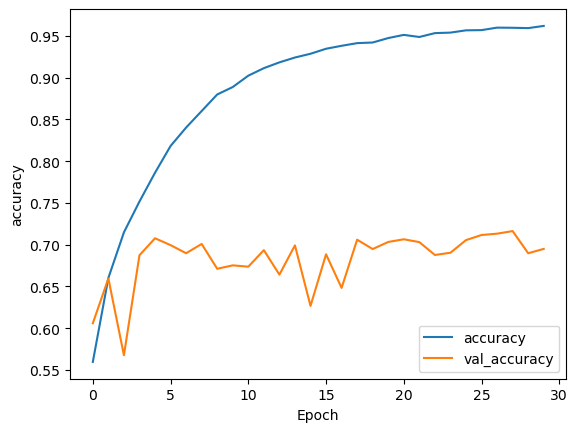

In [16]:
# Plot performance for "Accuracy" 
show_performance_curve(training_history,'accuracy','accuracy')

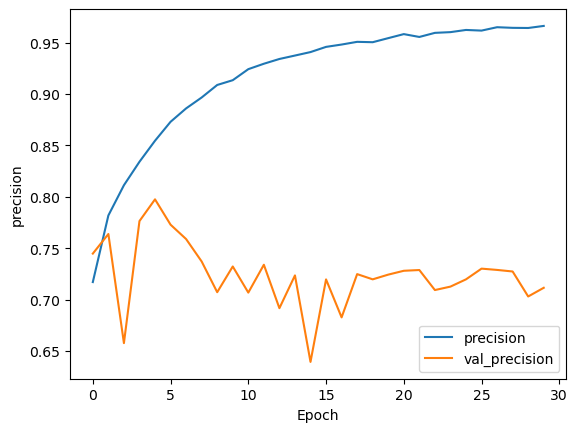

In [17]:
# Plot performance for "Precision" 
show_performance_curve(training_history,'precision','precision')

313/313 [==============================] - 1s 3ms/step


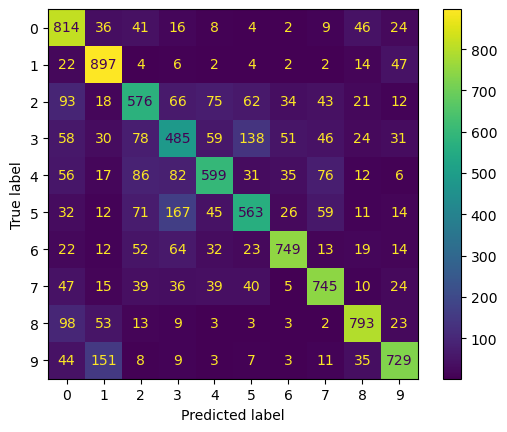

In [18]:
#Confusion matrix

test_predictions = model.predict(test_images)
test_predicted_labels = np.argmax(test_predictions, axis=1)
test_true_labels = np.argmax(test_labels,axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

In [ ]:
end = timer()
print("--- %s seconds ---" % (end-start))